# Direct reduction of iron ore with hydrogen 


## Weights of raw material input in the shaft furnace

1. It has been assumed 5% impurities are present in the raw materials. The assumption is consisten with the plant data available in the literature. Primary components of the impurities are silica and alumina.
2. It is assumed that the output from the shaft furnace would be metallic Fe and FeO. It is also assumed that all the FeO will be reduced to pure iron in the electric arc furnace. Although, in practice some amount of FeO does not get reduced and becomed a part of the EAF slag.
3. The ratio between metallic iron and iron oxide (FeO) is called the metallization rate of the furnace. Higher the metallization rate, higher will be the metallic iron content in the DRI output.At lower metallization rates more carbon needs to be added in the EAF furnace and lead to higher carbon footprint of the system.
4. Hydrogen at high temperature is considered to be the source of energy for the reactions inside the shaft furnace.
5. The iron ore pellets are heated from ambient temperature to 800 C, which is the reaction temperature. 
6. The flow rate of hydrogen is considered to be higher than the stocihiometric requirements.The ratio between the actual flow rate and the stoichiometric flow rate required for the reaction to occur is represented as lambda_h2 in the model.
7. DRI stream exiting the shaft furnace is considered to be at a high temperature (upto 600 C).Enthalpy of the DRI stream increases with temperature.
8. The exahust gas stream is assumed to be composed of hydrogen and water.The waste stream enthalpy varies with exhaust gas temperature and lambda_h2.
9. The energy balance between incoming energy from the hydrogen stream and outgoing streams and reaction enthalpy required for one ton of liquid steel has been calculated in this model.
10. Different values of metallization rate, input temperature of hydrogen,lambda_h2, exhaust gas temperature, and solid stream temperature have been modeled. 
11. A test case based on input values corresponding to a syn gas based DRI shaftfurnace will be considered for data validation. 

<img src="HDRI_electrolysis_08_10.png">

# Mass and energy balance for a direct reduction shaft furnace 

Iron ore pellets containing upto 5% impurities eneter the direct shaft furnace after being heated to the reaction temperature of $800 C $ by electrical heaters.


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
alpha=[0.94,0.93,0.92,0.91,0.90,0.89] # Metallization rates considered for the DRI reduction shaft furnace
fe2O3_pure=0.95 # Percentage of hematite in the raw material. 5% Impurities are considered in the iron ore which gets transferred into the EAF as it is 
Fe_O_ratio=112/160 # percentage of iron in one mole of iron ore 
hem_weight=1/(fe2O3_pure*Fe_O_ratio)# Weight of total iron ore fed to the DRI and EAF to get 1 ton of liquid steel
Feo_per=[]
for i in range(len(alpha)):
    Feo_per.append(hem_weight*fe2O3_pure*(1-alpha[i])*Fe_O_ratio) # Depends on the slag content , metallization rate 
print("FeO percentage :",Feo_per)
Feo_weight=[]
for i in range(len(Feo_per)):
    Feo_weight.append(Feo_per[i]*hem_weight)
    

SIO2_per=3 # Percentage of silica in the Slag 
Al2O3_per=2 #Percentage of alumina in the Slag
#CAO_percentage=4.5 #Percentage of lime added in the EAF slag is higher for DRI as the gangue content is higher making the system acidic
#MGO_percentage=0.53 #Percentage of Magnesium oxide in the EAF slag
SIO2_weight=(hem_weight*SIO2_per)/100 # SiO2 weight in ton 
AL2O3_weight=(hem_weight*Al2O3_per)/100 # weight in ton
print("Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process :",hem_weight)


FeO percentage : [0.06000000000000005, 0.06999999999999995, 0.07999999999999996, 0.08999999999999997, 0.09999999999999996, 0.10999999999999999]
Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process : 1.5037593984962407


In [10]:
m_fe2o3=hem_weight # mass flow rate of iron ore into the shaft 
m_sio2=SIO2_weight # mass flow rate of Silica into the shaft 
m_al2o3=AL2O3_weight # mass flow rate of Alumina into the shaft 
m_feo=Feo_weight # mass flow rate of Wustite from the DRI shaft furnace to the EAF


Mass flow rate of iron ore into the shaft : $M_{Fe_{2}O_{3}}$  <br />
Mass flow rate of Silica into the shaft : $M_{Sio_{2}}$   <br /> 
Mass flow rate of Alumina into the shaft : $M_{Al_{2}O_{3}}$ : <br />
Mass flow rate of Wustite from the DRI shaft furnace to the EAF : $M_{FeO}$ <br />
Stoichiometric Mass flow rate of hydrogen inside the DRI shaft furnace : $M_{H_{2}}$ <br />
Actual Mass flow rate of hydrogen inside the DRI shaft furnace : $M_{H_{2 actual}}$ <br />


## Molecular weight of raw materials fed to the shaft furnace

In [11]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams

## Energy required to heat the raw materials to 800 C

The raw materials (ore and impurities) are both heated from ambient temperature to 800 C, which is the reaction temperature.The heat is provided through electrical heaters at an electrical efficiency of 0.85. The input temperature of the pellets is considered to be 298 K and the exit temperature to be 1073 K. 

In [14]:
T1_hem=298 # K Ambient temperature / Temperature of the incoming iron pellets
T2_hem=1073 # K Temperature of the iron ore for reduction process
T1_sio2=298#Ambient temperature / Temperature of the incoming iron pellets
T2_sio2=1073 # Temperature of the iron ore for reduction process
T1_al2o3=298 #Ambient temperature / Temperature of the incoming iron pellets
T2_al2o3=1073 #Temperature of the iron ore for reduction process

# Enthalpy calculations for the different raw materials fed to the shaft furnace.

def fe2o3_enthalpy_1(T):# T1 and T2 should be in the range of 298-950 K 
    t=T/1000
    A=93.43834
    B=108.3577
    C=-50.86447
    D=25.58683
    E=-1.611330
    F=-863.2094
    G=161.0719
    H=-825.5032 
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=150.6240
    B=0
    C=0
    D=0
    E=0
    F=-875.6066
    G=252.8814
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_3(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=110.9362
    B=32.04714
    C=-9.192333
    D=0.901506
    E=5.433677
    F=-843.1471
    G=228.3548
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
if T2_hem in range(298,951):
    Fe2o3_En_per_mol=fe2o3_enthalpy_1(T2_hem)-fe2o3_enthalpy_1(T1_hem)
elif T2_hem in range(951,1051):
     Fe2o3_En_per_mol=fe2o3_enthalpy_2(T2_hem)-fe2o3_enthalpy_1(T1_hem)
elif T2_hem in range(1051,2501):
     Fe2o3_En_per_mol=fe2o3_enthalpy_3(T2_hem)-fe2o3_enthalpy_1(T1_hem)
mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
Fe2o3_En_per_ton=Fe2o3_En_per_mol*mol_per_ton_Fe2o3
H_Fe2o3=((Fe2o3_En_per_ton))*m_fe2o3 # Energy consumption in KJ
print("Enthalpy of Iron ore in KJ/kg :",Fe2o3_En_per_ton/1000)
print(" Enthalpy of iron ore in kJ :",H_Fe2o3) 

""" Energy required to heat the impurities from 298 K to 800 K"""
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
H_T1_sio2=sio2_enthalpy(T1_sio2) # Enthalpy of iron ore at the input of the DRI shaft furnace
H_T2_sio2=sio2_enthalpy(T2_sio2) # Enthalpy of molten iron at the reaction temperature
En_per_mol_sio2=H_T2_sio2-H_T1_sio2
    #print("Energy per mol",En_per_mol)
mol_per_ton_sio2=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*m_sio2 ## Energy per ton of SiO2 multiplied by the weight of sio2 in the solid stream
En_total_sio2=En_sio2 # H_f needs to be added only when there is a conversion from solid to liquid 

print("Enthalpy of sio2 in KJ :",En_sio2)


"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
H_T1_al2o3=Al2O3_enthalpy(T1_al2o3) # Enthalpy of DRI at the input 
H_T2_al2o3=Al2O3_enthalpy(T2_al2o3) # Enthalpy of molten steel at the output
En_per_mol_al2o3=H_T2_al2o3-H_T1_al2o3
#print("Energy per mole al2o3",En_per_mol_al2o3)

mol_per_ton_al2o3=1000000/mol_weight_al2o3 # 1 ton= 10^6 grams 
En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*m_al2o3 # Energy per ton of Al2O3 multiplied by the weight of Al2O3
En_total_al2o3=En_al2o3
print("Energy per ton of aluminium oxide :",En_al2o3) #In Kj/ton




Enthalpy of Iron ore in KJ/kg : 697.1709070984995
 Enthalpy of iron ore in kJ : 1048377.3039075182
Enthalpy of sio2 in KJ : 38299.203208586274
Energy per ton of aluminium oxide : 26265.60633766063


### Electrical energy required for heating the raw materials

In [16]:
eta_el_heat=0.85 # Electrical heating efficiency 
H_ore_heat=(H_Fe2o3+En_sio2+En_al2o3)/eta_el_heat # In KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KJ):",H_ore_heat) # in KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KWH):",H_ore_heat/3600) # in KWh

Electrical energy required for heating the iron ore to reduction temperature (in KJ): 1309343.6628867825
Electrical energy required for heating the iron ore to reduction temperature (in KWH): 363.70657302410626


## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

Iron ore is reducd by hydrogen at a temperature of 800-900 C in an endothermic reaction using 99.5 kJ/mol.<br />
$Fe_{2}O_{3}+ 3H_{2}---> 2Fe + 3H_{2}O$

In [17]:
H2_per_mol=3/2 # to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_weight=(H2_per_mol)*mol_weight_H2 # Weight of H2 for producing one mole of Fe in gms
mol_per_ton_fe=(1000000)/mol_weight_fe # Number of moles in 1 ton of Fe
H2_per_ton=(H2_weight*mol_per_ton_fe)/1000 # Weight of hydrogen in kg to reduce 1 ton of Fe2O3

print("Hydrogen required to produce 1 ton of iron in kg/ton of iron:", H2_per_ton)


 Hydrogen required to produce 1 ton of iron in kg/ton of iron  : 54.146655922643035


In [18]:
m_h2= H2_per_ton #Mass flow rate of hydrogen for production of one ton of steel.

 ### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)
 Actual amount of hydrogen entering the shaft furnace is higher than the stoichiometric value.The ration between the actual value and the stoichiometric value is defined as lambda_h2 in these calculations. The graph below shows the variation of mass flow rate of hydrogen with lamda_h2. 

In [19]:
lambda_h2=[]
H2_actual_ts=[]
for i in range(2,11):
    lambda_h2.append(i/2) # Iteratively add values to the list of lambda_h2 to see the effect of increasing lambda_h2
for i in range(len(lambda_h2)):
    H2_actual_ts.append(m_h2*lambda_h2[i]) # Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",H2_actual_ts,lambda_h2)

Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : [54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214, 243.65995165189366, 270.7332796132152] [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


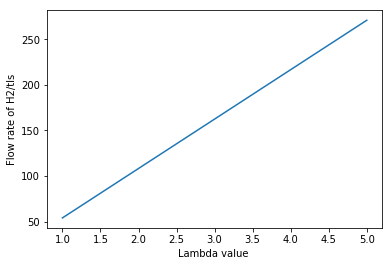

In [20]:
plt.plot(lambda_h2,H2_actual_ts)
plt.xlabel('Lambda value ')
plt.ylabel('Flow rate of H2/tls')
plt.savefig('Flow rate of hydrogen variation with lambda.svg')
plt.savefig('Flow rate of hydrogen variation with lambda.pdf')
plt.show()


## Mass flow rate of waste gases from the shaft furnace 

It is assumed that the waste gas stream is a mixture of unreacted hydrogen and water/steam produced from the reduction reaction. Amount of water produced would depend on the metallization rate. For ease of calculations, it is assumed that metallization is complete.Amount of unused hydrogen in the waste stream depends on the amount of hydrogen entering the shaft furnace or lambda_h2.

Hydrogen is separated from the waste gas stream is mixed with the incoming hydrogen from the electrolyser.The mixed stream is heated to a temperature of 800-900 C and is fed to the shaft furnace.Water separated from the waste stream is fed back to the electrolyser.Hydrogen can be fed back to the shaft furnace from the storage to provide flexibility to the grid.It is not considered in the calculations as only steady state calculations are done in this analysis. 

<img src="Electricheater_h2.png">

In [37]:
# Mass flow rate of water in the waste stream per ton of steel production

water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000
print("Amount of water in the waste stream per ton of steel production in kg/tls",water_tls) #kg/tls
## Calculation of the hydrogen in the waste stream 
m_h2_waste_stream=[]
m_water_tls=[]
for j in range(len(lambda_h2)):
    m_h2_waste_stream.append(m_h2*(lambda_h2[j]-1)) #Kg/tls
    m_water_tls.append(water_tls)
    # The value varies with input flow rate of hydrogen inside the shaft furnace
print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",m_h2_waste_stream)


Amount of water in the waste stream per ton of steel production in kg/tls 483.89202256244965
Amount of hydrogen in the waste stream per ton of steel production in kg/tls [0.0, 27.073327961321517, 54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214]


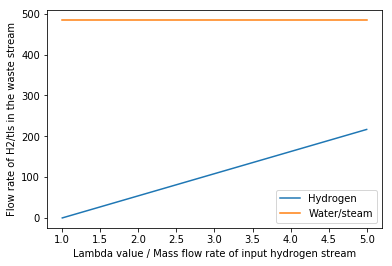

In [38]:
plt.plot(lambda_h2,m_h2_waste_stream,label='Hydrogen')
plt.plot(lambda_h2,m_water_tls,label='Water/steam')
plt.xlabel('Lambda value / Mass flow rate of input hydrogen stream')
plt.ylabel('Flow rate of H2/tls in the waste stream')
plt.savefig('Flow rate of Waste stream variation with lambda.svg')
plt.savefig('Flow rate of Waste stream variation with lambda.pdf')
plt.legend()
plt.show()


## Energy contained in the waste stream

Temperature of the waste gas stream could vary according to the input temperature and flow rate of the hydrogen stream.Plant data from Syngas based DRI shaft furnace show that the temperature could vary from 275 C to 400 C.Higher temperatures are witnessed when the content of CO in the Syngas is higher.The reduction reaction between heamtite and CO is exothermic.On the other hand , hyrogen reduction of hematite is endothermic.We could assume a temperature of 350 C for the calculation of energy content in the waste gas stream.Hydrogen from the waste stream is fed back to the electrical heating system , where it gets mixed with hydrogen coming from the electrolyser output.Energy required to separate the two streams has not been considered in the present calculations. 

In [47]:
T_waste=623 # K Temperature of the exhaust gas leaving the reduction shaft furnace

### Enthalpy contained in water stream

In [46]:
def H2O_enthalpy(T):# 500 -1700 K reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2O_en_per_mol=H2O_enthalpy(T_waste)
mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg
H2O_en_per_kg=(mol_per_kg_H2O)*(H2O_en_per_mol)

print("Enthalpy per Kg of Water in kJ/kg :",H2O_en_per_kg)
# Multiplying the specific enthalpy with mass flow rate 
h2o_enthalpy=water_tls*H2O_en_per_kg
print("Enthalpy in water stream per Kg of steel in kJ:",h2o_enthalpy)


Enthalpy per Kg of Water in kJ/kg : 629.405546043845
Enthalpy in water stream per Kg of steel in kJ: 304564.3226871792


### Enthalpy in the hydrogen from the waste stream

In [65]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_en_per_mol=H2_enthalpy_1(T_waste)     
#mol_per_kg_H2=(1000/mol_weight_H2) # Number of moles in one kg 
H2_en_per_kg=((1000/mol_weight_H2)*H2_en_per_mol)
h2_en_tls=[]
for i in range(len(m_h2_waste_stream)):
    h2_en_tls.append(H2_en_per_kg*(m_h2_waste_stream[i]))
print("Enthalpy per Kg of hydrogen in kJ/kg :",H2_en_per_kg)
print("Enthalpy per Kg of hydrogen in kJ/kg :",h2_en_tls)


Enthalpy per Kg of hydrogen in kJ/kg : 4705.692808769396
Enthalpy per Kg of hydrogen in kJ/kg : [0.0, 127398.76469704608, 254797.52939409215, 382196.2940911382, 509595.0587881843, 636993.8234852304, 764392.5881822763, 891791.3528793225, 1019190.1175763686]


In [70]:
waste_enth=[]
for i in range(len(h2_en_tls)):
    waste_enth.append((h2_en_tls[i]+h2o_enthalpy)/1000)

### Plot for the Hydrogen energy variation

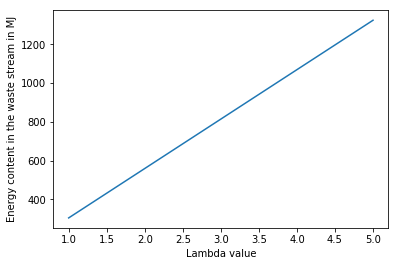

In [71]:
plt.plot(lambda_h2,waste_enth)
plt.xlabel('Lambda value')
plt.ylabel('Energy content in the waste stream in MJ')
plt.savefig('Energy content in waste stream with lambda.svg')
plt.savefig('Energy content in waste stream with lambda.pdf')
plt.show()

## Energy input to the hydrogen stream

Hydrogen reduces the iron oxide pellets by converting them into Fe3O4---FeO----Fe.The optimal reaction temperature is 800 C (according to the experimental studies carried out to study the reaction kinetics).It is assumed that the heat for the reaction is transferred from the high temperature hydrogen.Different input temperatures are considered to see the impact of inlet temperature on the overall energy consumption of the furnace. Alkaline and PEM electrolysers produce hydrogen at a temperature of 70-80 C.Reduction of iron oxide is carried out a temperature of 800-900 C.In this section we calculate the amount of heat required to heat the hydrogen exiting the electrolyser to the reaction temperature.The value depends on the flow rate of hydrogen from the elctrolyser and from the waste gas stream.Temperature of the hydrogen from the waste stream needs to be increased from 623 K to 1073-1273 K, whereas , temperature of the hydrogen from the elctrolyser needs to be increased from 343 K to 1073-1273 K.  <br />
$
M_{h_{2_{actual}}} =M_{h_{2_{electrolyser}}} + M_{h_{2_{waste stream}}}  $ <br />

$T_{h_{2_{electrolyser}}}=343 K$  <br />

$T_{h_{2_{waste stream}}}=623 K$ <br />

$M_{h_{2_{electolyser}}}=M_{h_{2_{actual}}}- M_{h_{2_{waste stream}}} $

$T_{h_{2_{input}}}=1073 K -1273 K $


### Mass flow rate of hydrogen from the electrolyser

In [93]:
m_h2_electrolyser=[]
for i in range(len(H2_actual_ts)):
    m_h2_electrolyser.append(H2_actual_ts[i]-m_h2_waste_stream[i])
T_electrolyser=343 # output hydrogen at a temperature of 70 C


### Energy required to heat the hydrogen stream to 1073-1273 K

In [94]:
T_h2_input=[1073,1098,1123,1148,1173,1198,1223,1248,1273]

In [95]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

def H2_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=18.563083
    B=12.257357
    C=-2.859786
    D=0.268238
    E=1.977990
    F=-1.147438
    G=156.288133
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_in_en_per_mol=[]
H2_in_en_per_kg=[]
for i in range(len(T_h2_input)):
    if T_h2_input[i] in range(298,1001):
        H2_in_en_per_mol.append(H2_enthalpy_1(T_h2_input[i]))
    elif T_h2_input[i] in range(1001,2501):
        H2_in_en_per_mol.append(H2_enthalpy_2(T_h2_input[i]))
  
    mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg 

for j in range(len(T_h2_input)):
    H2_in_en_per_kg.append(mol_per_kg_H2*H2_in_en_per_mol[j])
print("Enthalpy per Kg of input  hydrogen at 1073 K in kJ/kg :",H2_in_en_per_kg)


Enthalpy per Kg of input  hydrogen at 1073 K in kJ/kg : [11357.178654536647, 11735.68092099354, 12115.410167028142, 12496.396476478576, 12878.665081966752, 13262.236903617199, 13647.129021702476, 14033.355092480218, 14420.925715031339]


#### H2 enthalpy at 623 K and 343 K

In [96]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

In [97]:
en_h2_waste=(H2_enthalpy_1(T_waste)*(1000/mol_weight_H2))
en_h2_electrolyser=(H2_enthalpy_1(T_electrolyser)*(1000/mol_weight_H2))

### Fixing the output temperature to 1273 K

In [98]:
total_heat_per_kg=[]
for i in range(len(H2_in_en_per_kg)):
    total_heat_per_kg.append((H2_in_en_per_kg[8]*H2_actual_ts[i])-(en_h2_waste*m_h2_waste_stream[i])-(en_h2_electrolyser*m_h2_electrolyser[i]))
eta_heat=0.7
total_heat=[]
for i in range(len(total_heat_per_kg)):
    total_heat.append(total_heat_per_kg[i]/(3600*eta_heat))

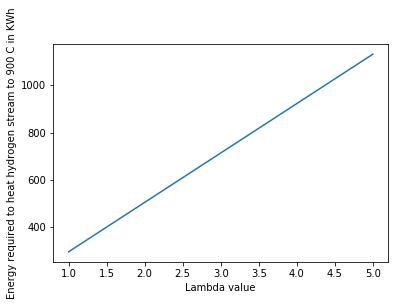

In [92]:
plt.plot(lambda_h2,total_heat)
plt.xlabel('Lambda value')
plt.ylabel('Energy required to heat hydrogen stream to 900 C in KWh')
plt.savefig('Energy required to heat hydrogen stream to 900 C in kJ.svg')
plt.savefig('Energy required to heat hydrogen stream to 900 C in kJ.pdf')
plt.show()

## Reaction enthalpy calculation

In [101]:
fe2o3_hem = 1
h2_hem = 3
fe_hem = 2
h2o_hem = 3
dHb_fe2o3 = -825500 #		 '[J/mol] formation enthalpy of hematite
dHb_w = -242000 #	 '[J/mol] formation enthalpy of water (gaseous)
dHr_hem = (dHb_w * h2o_hem) - dHb_fe2o3 #'[J/mol] reaction enthalpy
print("Reaction enthalpy in J/mol: ",dHr_hem) 
dhr_hem_kj=dHr_hem/1000 # reaction enthalpy kJ/mol
print("Reaction enthalpy in kJ/mol: ",dhr_hem_kj) 
dhr_hem_kj_kg=(dhr_hem_kj/mol_weight_fe2o3)*1000 # reaction ethalpy in kj/kg
print("Reaction enthalpy in kJj/Kg of hematite: ",dhr_hem_kj_kg)
dhr_hem_kj_ton=dhr_hem_kj_kg*1000
print("Reaction enthalpy in kJ per ton of heamtite : ",dhr_hem_kj_ton) # kJ/ton of fe2O3 
# Amount of heat to be supplied in kJ for production of 1 ton of molten steel
dhr_per_ts=dhr_hem_kj_ton*m_fe2o3*fe2O3_pure
print("Reaction enthalpy in kJ/ton of liquid steel:",dhr_per_ts) 

Reaction enthalpy in J/mol:  99500
Reaction enthalpy in kJ/mol:  99.5
Reaction enthalpy in kJj/Kg of hematite:  623.0900255498221
Reaction enthalpy in kJ per ton of heamtite :  623090.0255498221
Reaction enthalpy in kJ/ton of liquid steel: 890128.6079283174


## Energy contained in the solid stream exiting the DRI
It is assumed that the solid stream is a mixture of iron, iron oxide and impurities such as silica and alumina. The solid stream exits the reactor at a temperature of 800 C. 

In [ ]:
"""Enthalpy of the residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""
# The constants are used for a temperature range of 298-1650 K and the fusion enthalpy is added in the mix to account for the latent heat of fusion , whcih is an endothermic reaction
T_dri_exit=1073 # Exit temperature of the FeO stream contained in the solid stream exiting the reactor
En_per_mol_feo =[]
En_per_ton_feo=[]
mol_per_ton_feo=1000000/mol_weight_feo# 1 ton= 10^6 grams
En_feo=[]
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
for i in range(12):
    En_per_mol_feo.append(feo_enthalpy(T_dri_exit[i])) # Using a loop to get enthalpy of Feo under different temperatures
for k in range(12):
    En_per_ton_feo.append(En_per_mol_feo[k]*mol_per_ton_feo) # Enthalpy calculation for different percentages of feo based on differetn metallization rates

for i in range(6):
    for j in range(12):
        En_feo.append(En_per_ton_feo[j]*Feo_percentage[i])
        #print("Temperature",T_dri_exit[j])
        #print("alpha",alpha[i])
#print("Energy per mole feo :",En_per_mol_feo)
#print("Energy per ton feo :",En_per_ton_feo)
#print("Energy contained in the feo stream exiting the reactor",En_feo) #In Kj/tls

### Energy contained in the iron ore stream
En_per_mol_fe=[]
En_fe=[]
def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
#H_f=247000 # Melting enthalpy of steel per ton in Kj/ton https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
for i in range(12):
    En_per_mol_fe.append(fe_enthalpy(T_dri_exit[i]))# Enthalpy of direct reduced iron at the output of the reactor
print(En_per_mol_fe)
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams
for i in range(6):
    for k in range(12):
        En_fe.append(En_per_mol_fe[k]*mol_per_ton_fe*iron_ore_dri*Total_fe2O3*(alpha[i])*iron_oxygen_ratio)
#print("Energy per ton of DRI", En_fe) #In Kj/ton
df_ex=pd.read_csv('alpha_temperature.csv')
df_ex['En_fe']=En_fe
df_ex['En_feo']=En_feo
df_ex.head(10)
df_ex.to_csv('waste stream enthalpy', encoding='utf-8', index=False)

In [ ]:
plt.plot(df_ex['Alpha'],df_ex['En_fe'],df_ex['Alpha'],df_ex['En_feo'])

In [ ]:
H_imp=[]
for j in range(12):
    H_imp.append((sio2_enthalpy(T_dri_exit[j])*mol_per_ton_sio2*SIO2_weight) +(Al2O3_enthalpy(T_dri_exit[i])*mol_per_ton_al2o3*AL2O3_weight))
print("Energy exiting through the impurities contained in the solid stream at Exit temperatures:",H_imp)
plt.plot(T_dri_exit,H_imp)

In [ ]:
H_imp_list=[]
for i in range(6):
    for j in range(12):
        H_imp_list.append(H_imp[j]) # making a list with equal values of terms


In [ ]:
df_ex['H_imp']=H_imp_list
df_ex['H_solid'] =  df_ex[['En_fe', 'En_feo','H_imp']].sum(axis=1)
df_ex.to_csv('Solid stream enthalpy.csv', encoding='utf-8', index=False)
plt.plot(df_ex['Temperature'],df_ex['H_solid'],label='H_solid')
plt.plot(df_ex['Temperature'],df_ex['H_imp'],label='H_impurities',color='black')
plt.plot(df_ex['Temperature'],df_ex['En_fe'],label='H_fe')
plt.plot(df_ex['Temperature'],df_ex['En_feo'],label=['H_feo'])
plt.legend(loc='upper left')
plt.figure(figsize=(30,20))


## Energy balance for the shaft furnace 

H_h2=H_Fe2O3 + H_solid + H_offgas+ reaction_enthalpy